In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [39]:
df = pd.read_csv('E:\ML\TS-forecasting\gold_monthly_csv.csv')
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [40]:
df.shape

(847, 2)

In [41]:
print(f"Date range of gold prices avalilable from - {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]} ")

Date range of gold prices avalilable from - 1950-01 to 2020-07 


In [42]:
date = pd.date_range(start = '1/1/1950' , end = '8/1/2020', freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [43]:
df['month'] = date
df.drop('Date', axis=1, inplace=True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


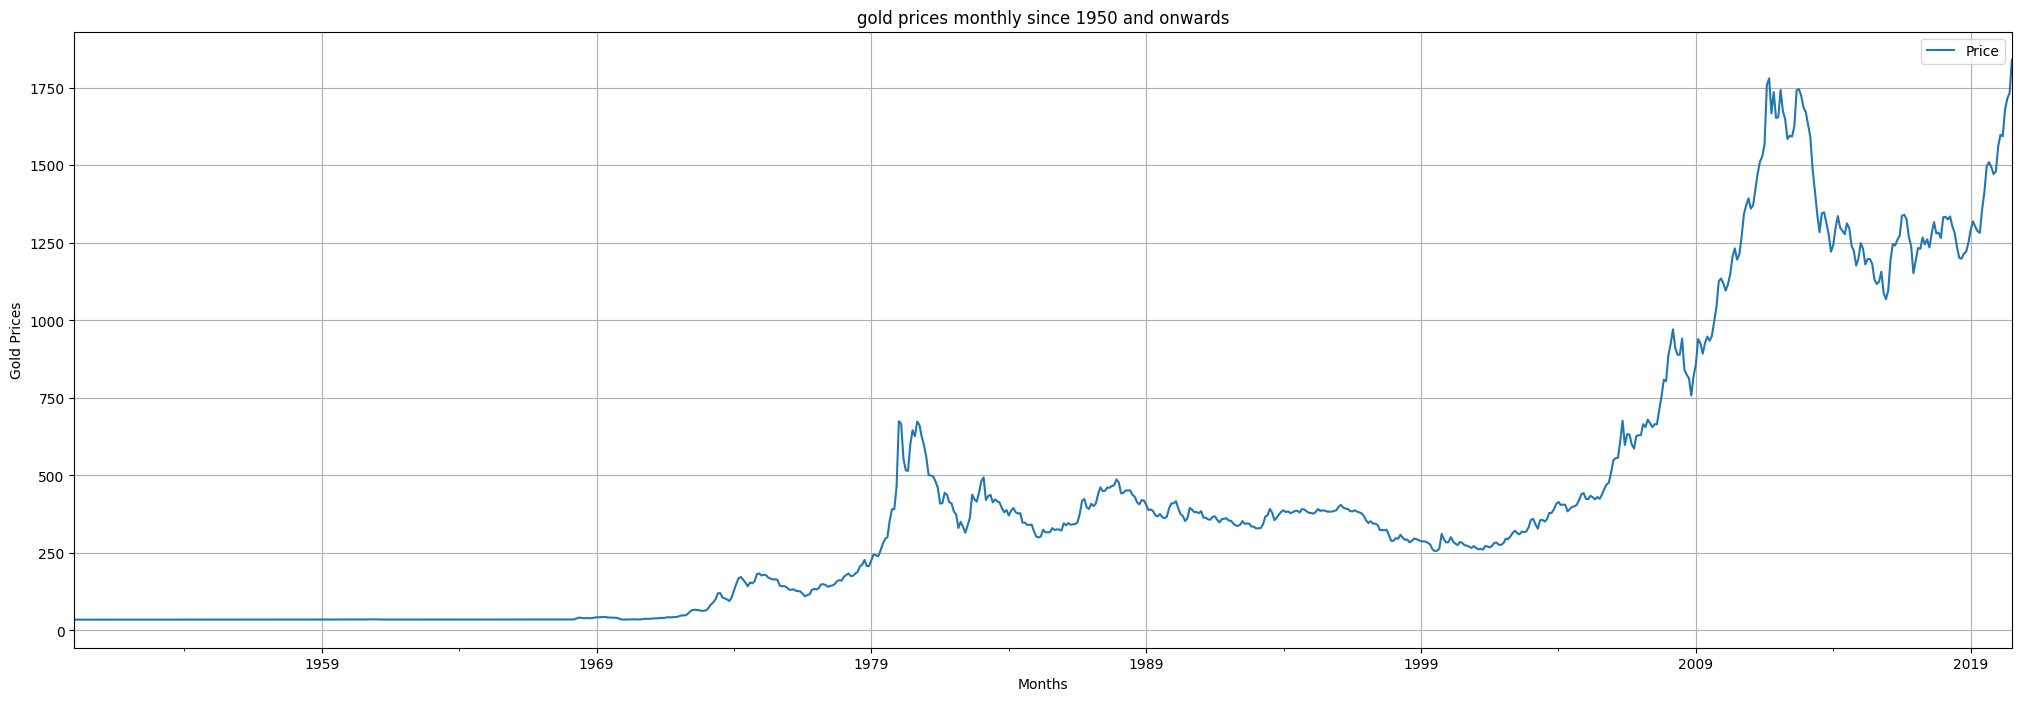

In [44]:
df.plot(figsize=(25,8))
plt.title("gold prices monthly since 1950 and onwards")
plt.xlabel('Months')
plt.ylabel('Gold Prices')
plt.grid()

In [45]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


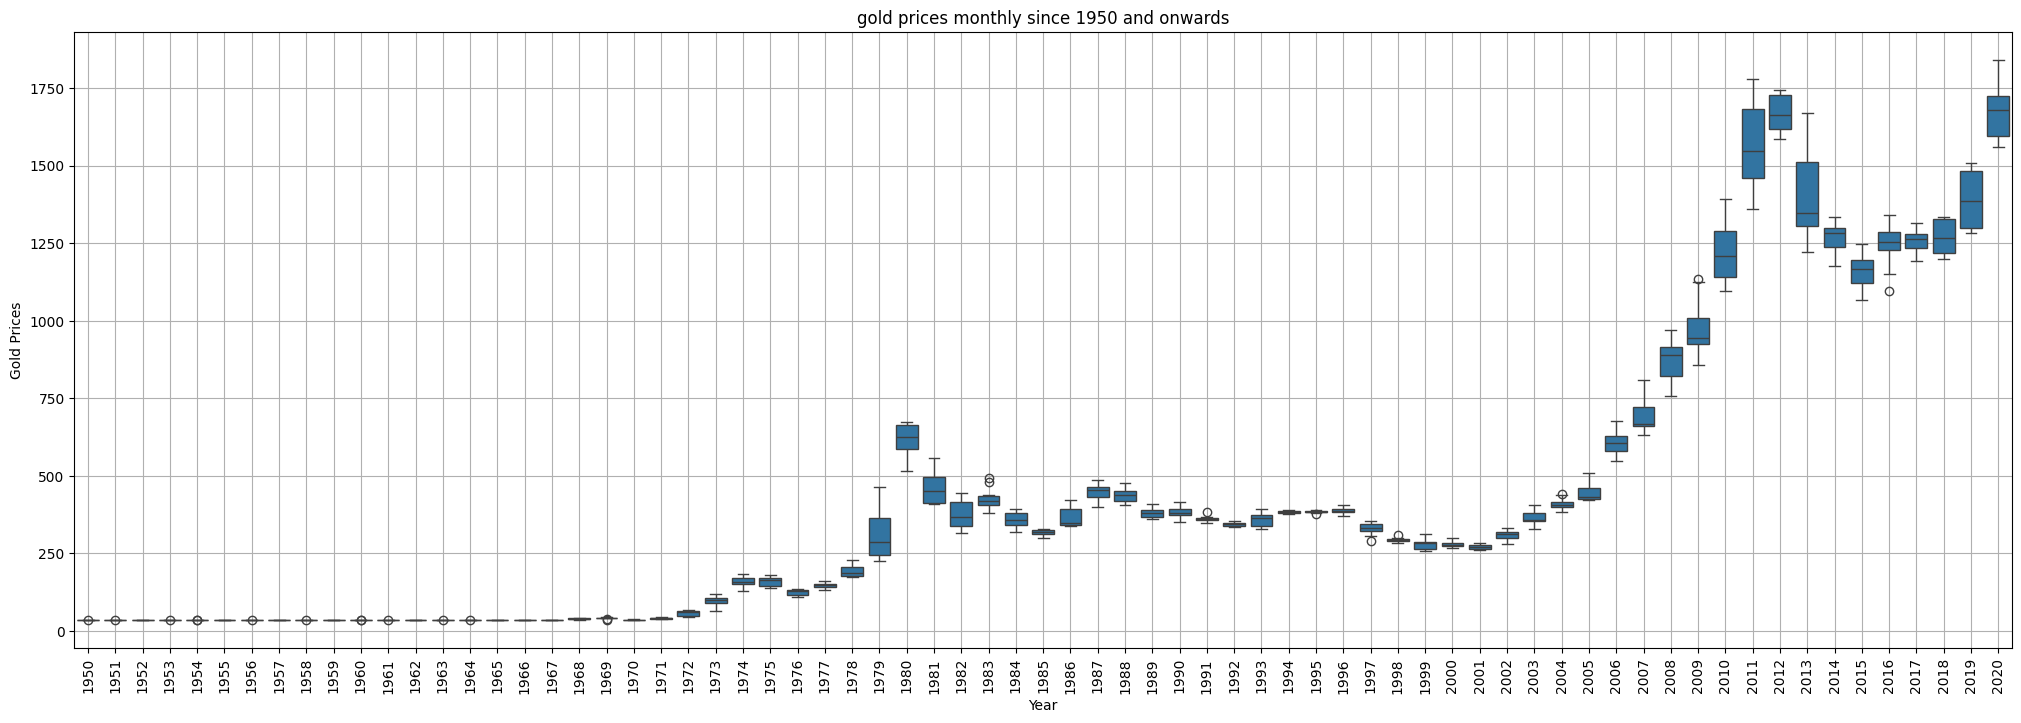

In [46]:
_,ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year, y = df.values[:,0], ax=ax)
plt.title('gold prices monthly since 1950 and onwards')
plt.xlabel('Year')
plt.ylabel('Gold Prices')
plt.xticks(rotation=90)
plt.grid()

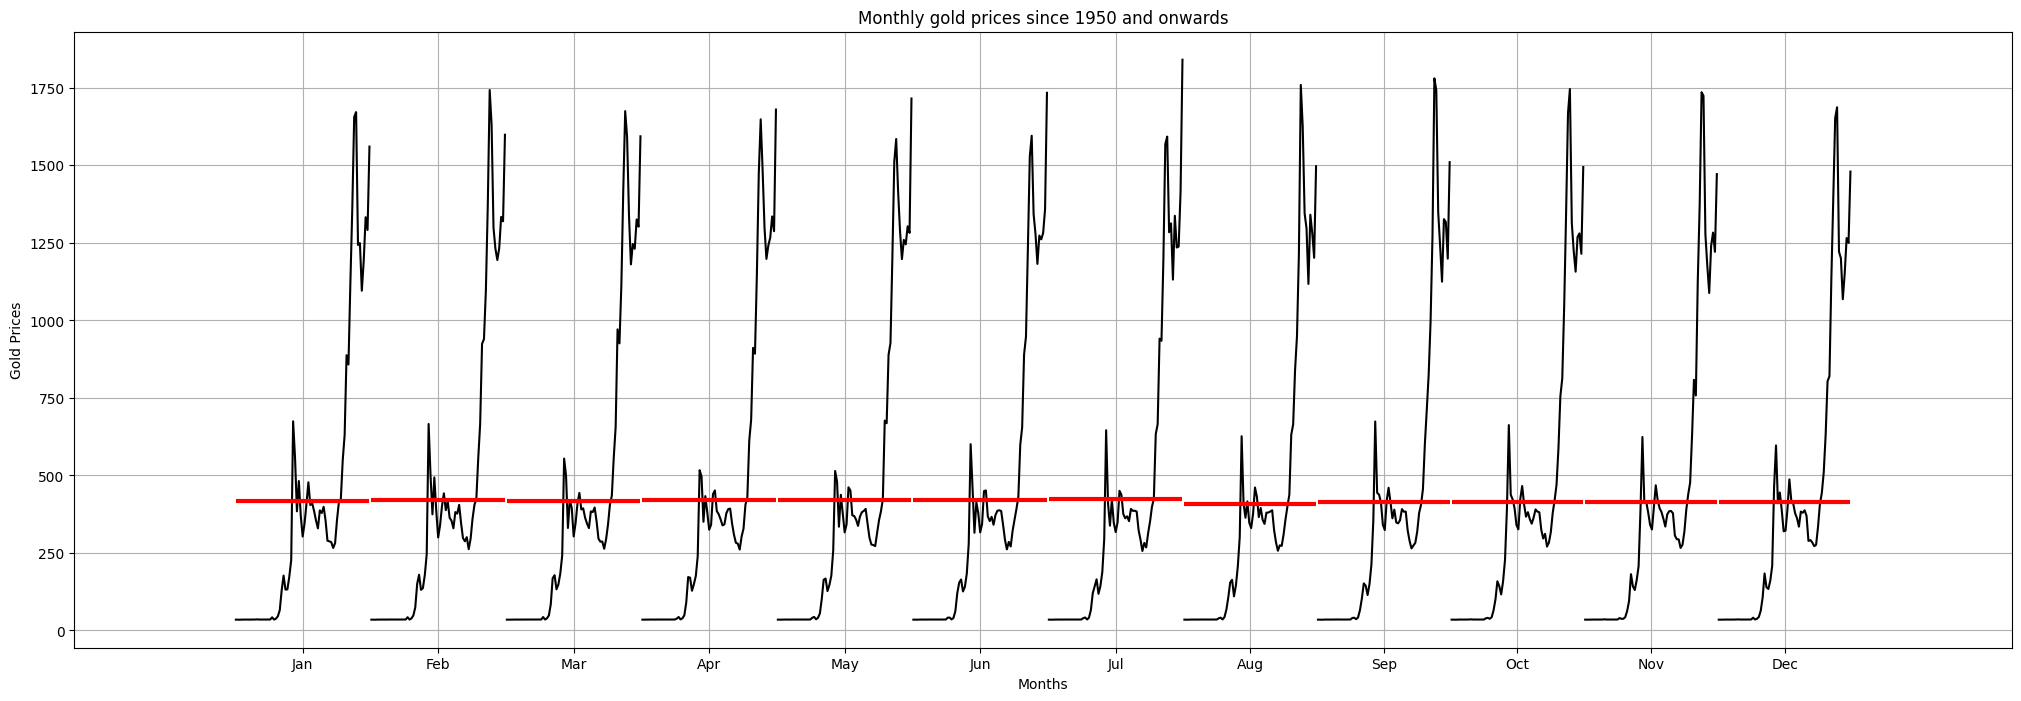

In [47]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize=(25,8))
month_plot(df, ylabel='gold price', ax=ax)
plt.title('Monthly gold prices since 1950 and onwards')
plt.xlabel('Months')
plt.ylabel('Gold Prices')
plt.grid()

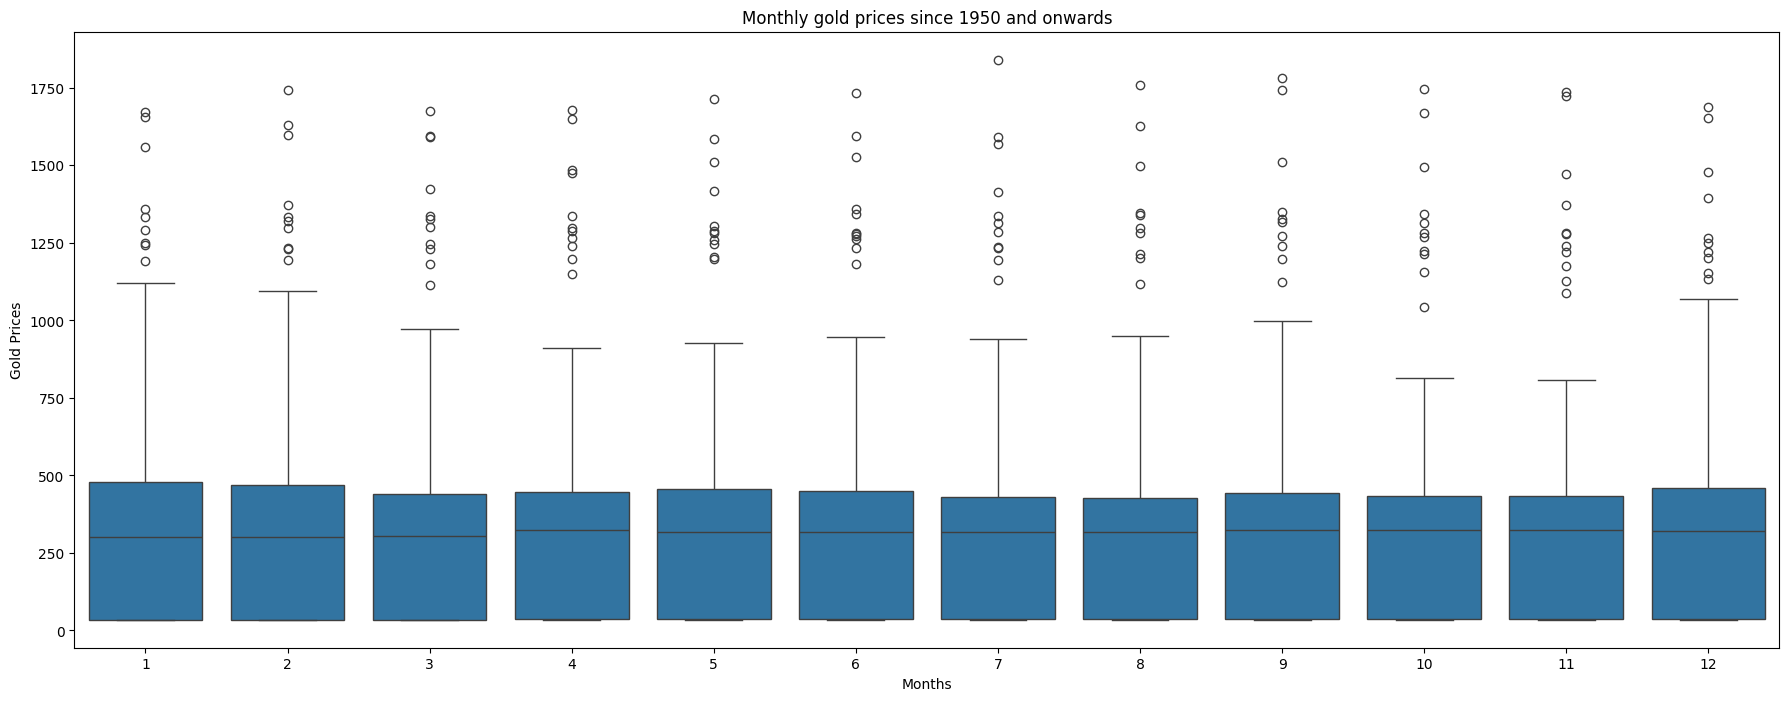

In [48]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month, y = df.values[:,0], ax=ax)
plt.title('Monthly gold prices since 1950 and onwards')
plt.xlabel('Months')
plt.ylabel('Gold Prices')
plt.show()

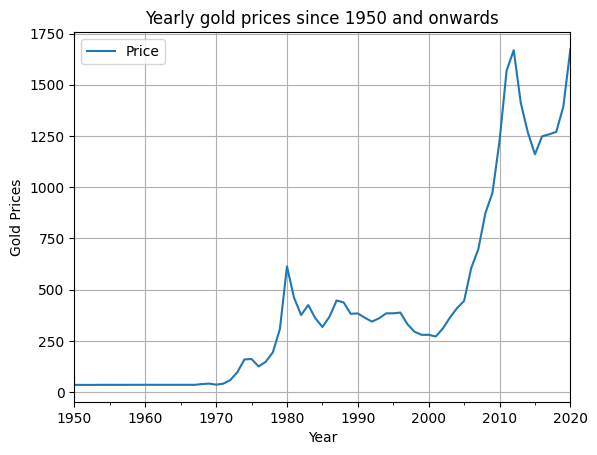

In [49]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title("Yearly gold prices since 1950 and onwards")
plt.xlabel('Year')
plt.ylabel('Gold Prices')
plt.grid()

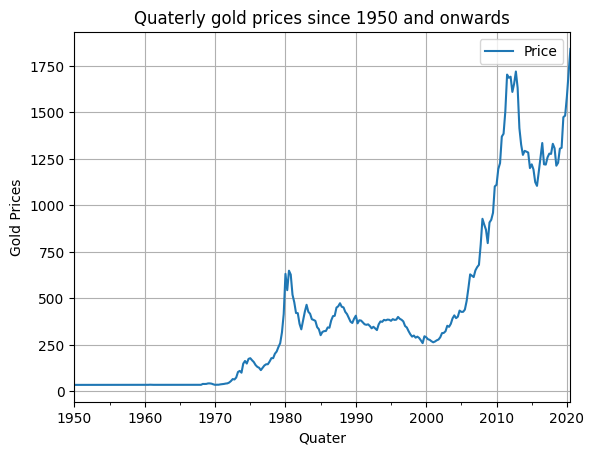

In [50]:
df_quaterly_sum = df.resample('Q').mean()
df_quaterly_sum.plot()
plt.title("Quaterly gold prices since 1950 and onwards")
plt.xlabel('Quater')
plt.ylabel('Gold Prices')
plt.grid()

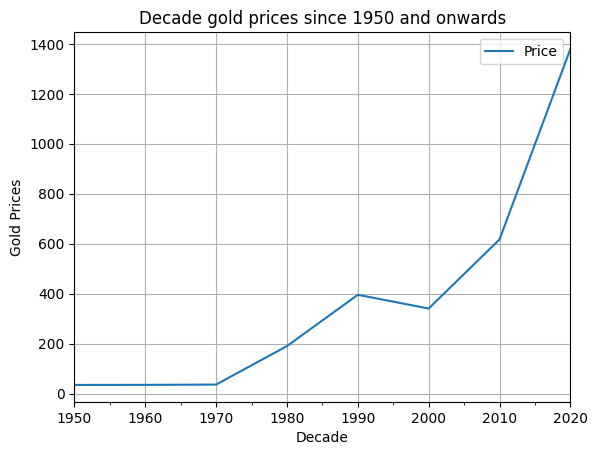

In [51]:
df_decade_sum = df.resample('10A').mean()
df_decade_sum.plot()
plt.title("Decade gold prices since 1950 and onwards")
plt.xlabel('Decade')
plt.ylabel('Gold Prices')
plt.grid()

In [52]:
df_1  = df.groupby(df.index.year).mean().rename(columns={'Price': 'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price': 'Std'}), left_index=True, right_index=True)
df_1['Cov_pct'] = ((df_1['Std'] / df_1['Mean']) * 100).round(2)
df_1.head()


,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


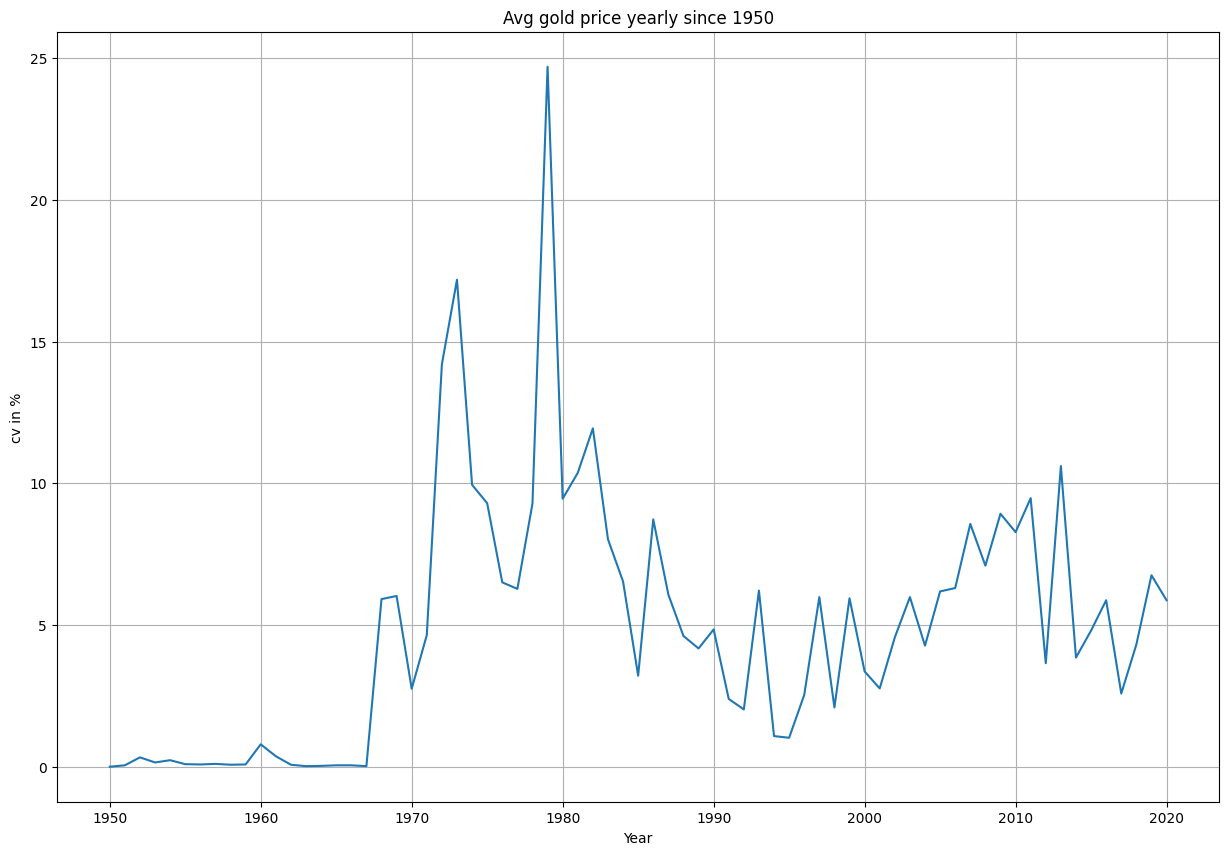

In [53]:
fig, ax = plt.subplots(figsize=(15,10))
df_1['Cov_pct'].plot()
plt.title('Avg gold price yearly since 1950')
plt.xlabel('Year')
plt.ylabel('cv in %')
plt.grid()

Time series Analysis

In [54]:
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

In [55]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


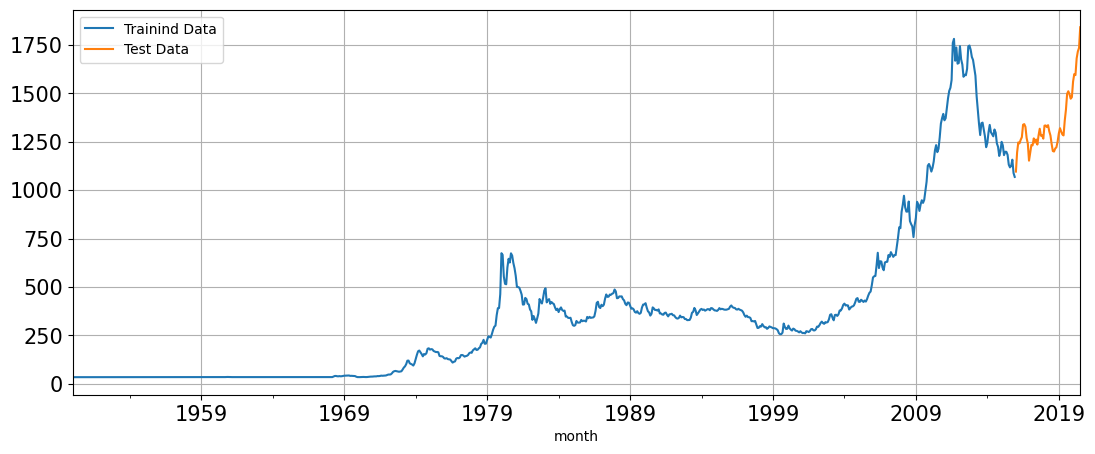

In [56]:
train['Price'].plot(figsize=(13,5),fontsize = 15)
test['Price'].plot(figsize=(13,5),fontsize = 15)
plt.grid()
plt.legend(['Trainind Data', 'Test Data'])
plt.show()

In [57]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [58]:
LR_train = train.copy()
LR_test = test.copy()

In [59]:
LR_train['time'] = train_time
LR_test['time'] = test_time


In [60]:
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['Price'].values)

LinearRegression()

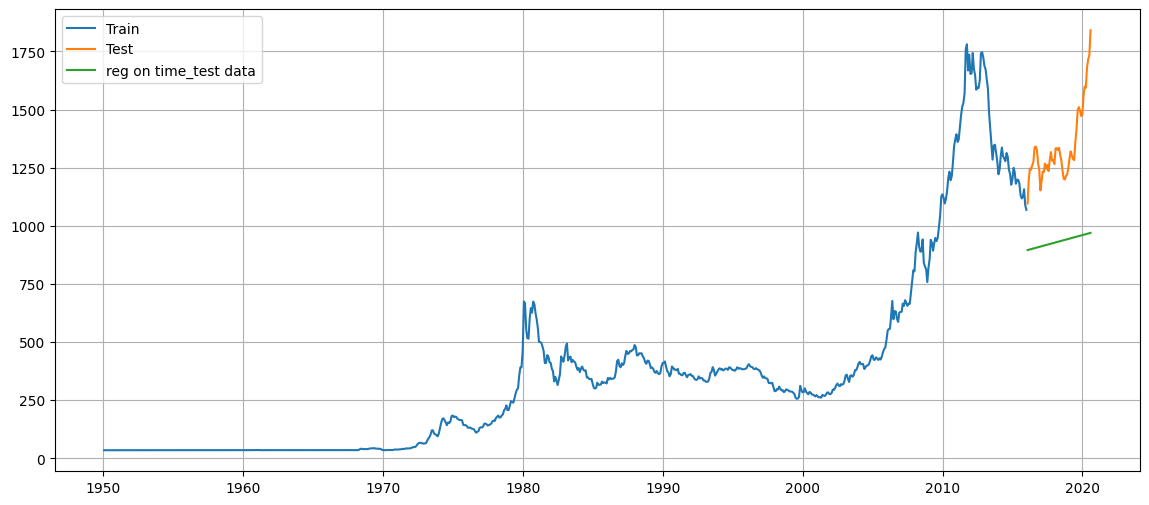

In [61]:
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_predictions_model1

plt.figure(figsize = (14,6))
plt.plot(train['Price'], label = 'Train')
plt.plot(test['Price'], label = 'Test')
plt.plot(LR_test['forecast'], label = 'reg on time_test data')
plt.legend(loc = 'best')
plt.grid()

In [62]:
def mape(actual, pred):
    return round((np.mean(abs(actual - pred) / actual)) * 100, 2)

In [63]:
mape_model1_test = mape(test['Price'].values, test_predictions_model1)
print("MAPE is %3.3f"%(mape_model1_test),"%")

MAPE is 29.760 %


In [64]:
results = pd.DataFrame({'TestMape (%)': [mape_model1_test]}, index = ['Linear Regression on time'])
results

,TestMape (%)
Linear Regression on time,29.76


In [65]:
Naive_train = train.copy()
Naive_test = test.copy()

In [66]:
Naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

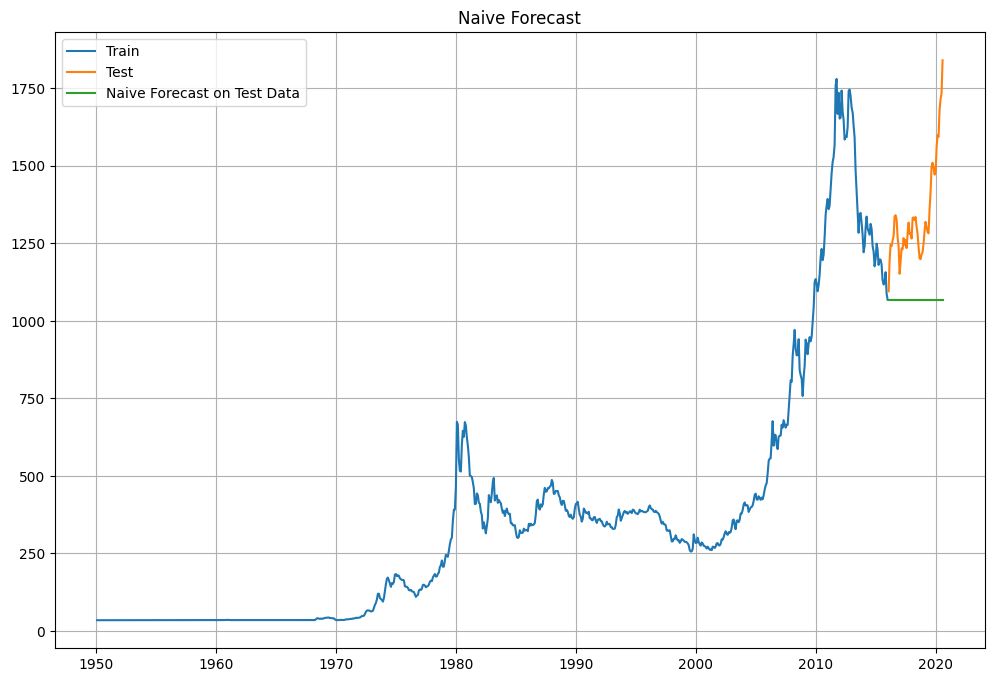

In [67]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train["Price"], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(Naive_test['naive'], label = 'Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid()

In [68]:
mape_model2_test = mape(test['Price'].values, Naive_test['naive'].values)
print("for Naive forecast on the Test Data, MAPE is %3.3f"%(mape_model2_test),"%")

for Naive forecast on the Test Data, MAPE is 19.380 %


In [69]:
resultsDf_2 = pd.DataFrame({'Test MAPE (%)': [mape_model2_test]}, index=['NaiveModel'])
results = pd.concat([results, resultsDf_2])
results

,TestMape (%),Test MAPE (%)
Linear Regression on time,29.76,NaN
NaiveModel,NaN,19.38


In [70]:
final_model = ExponentialSmoothing(df,
                                   trend = 'additive',
                                   seasonal = 'additive',).fit(smoothing_level = 0.4,
                                                               smoothing_trend = 0.3,
                                                               smoothing_seasonal = 0.6)

In [71]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("MAPE:", Mape_final_model)

MAPE: 17.24


In [74]:
predictions = final_model.forecast(steps =len(test))

In [76]:
pred_df = pd.DataFrame({'lower_CI': predictions - 1.96 * np.std(final_model.resid, ddof=1),
                            'prediction': predictions,
                            'upper_CI': predictions + 1.96 * np.std(final_model.resid, ddof=1)})
pred_df.head()


,lower_CI,prediction,upper_CI
2020-08-31,1684.719922,1792.870894,1901.021866
2020-09-30,1615.305634,1723.456606,1831.607579
2020-10-31,1538.567122,1646.718094,1754.869067
2020-11-30,1476.757432,1584.908404,1693.059376
2020-12-31,1459.325790,1567.476763,1675.627735


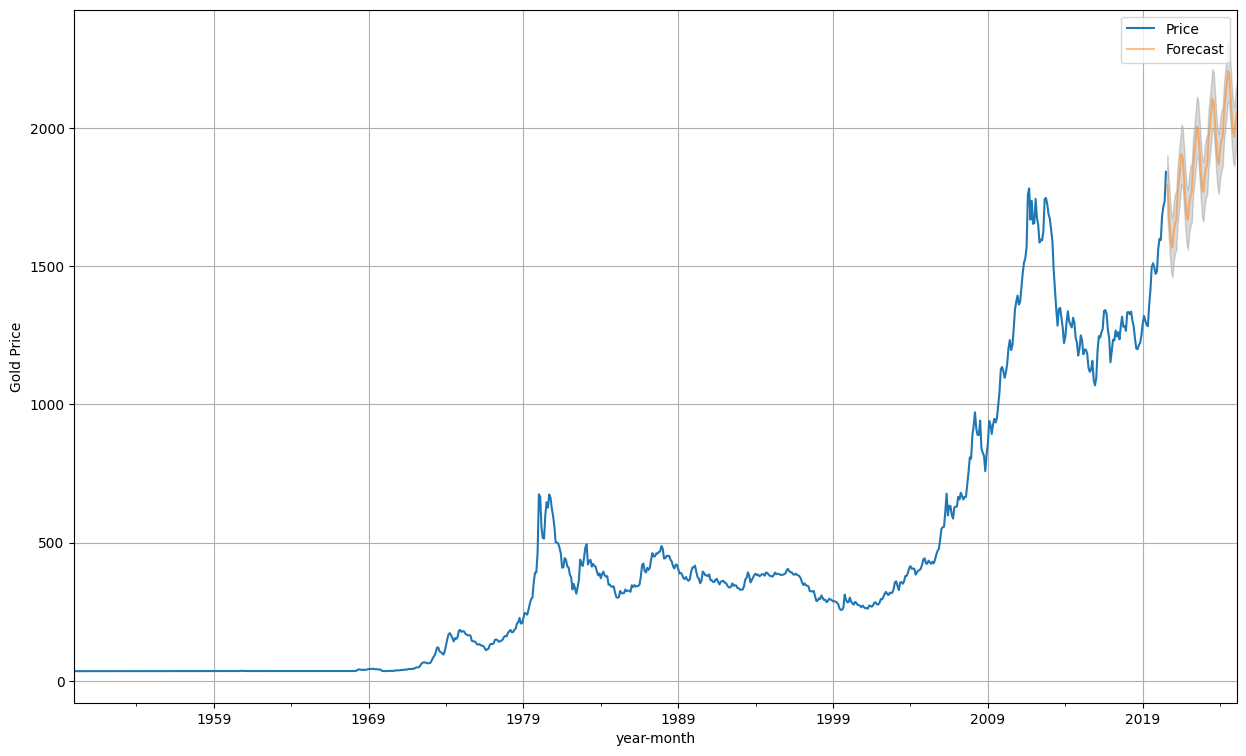

In [77]:
axis = df.plot(label = 'Actual', figsize = (15,9))
pred_df['prediction'].plot(ax = axis, label = 'Forecast', alpha = 0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color = 'k', alpha = .15)
axis.set_xlabel('year-month')
axis.set_ylabel('Gold Price')
plt.legend(loc = 'best')
plt.grid()
plt.show()